<a href="https://colab.research.google.com/github/73Shivam/Projects/blob/master/Copy_of_CNN_using_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition using CNN

In [ ]:
%tensorflow_version 2.x

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers ,models

In [ ]:
(train_images,train_labels ), (test_images, test_labels) =  datasets.cifar10.load_data()
print(f"train labels {train_labels.shape}")
print(f"train images {train_images.shape}")

170500096/170498071 [==============================] - 2s 0us/step
train labels (50000, 1)
train images (50000, 32, 32, 3)


In [ ]:
class_names= ["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_labels[1][0] # 1st image label index

9

In [ ]:
class_names[train_labels[1][0]] # actual label

'truck'

In [ ]:
import numpy as np

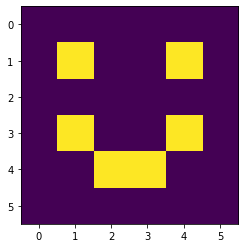

In [ ]:
x = np.array([
              [0,0,0,0,0,0],
              [0,1,0,0,1,0],
              [0,0,0,0,0,0],
              [0,1,0,0,1,0],
              [0,0,1,1,0,0],
              [0,0,0,0,0,0],
])
plt.imshow(x)
plt.show()

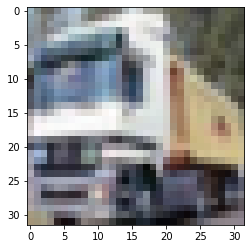

In [ ]:
plt.imshow(train_images[1])

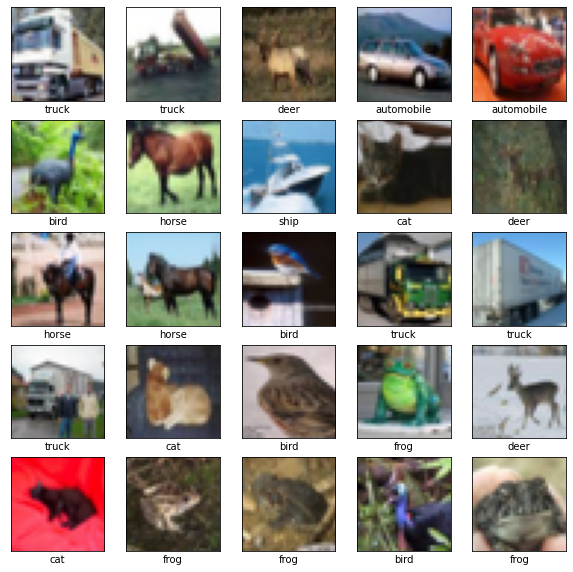

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1, 26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# CNN architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_logs = 'logs'
tensorflow_callback = tf.keras.callbacks.TensorBoard(train_logs,histogram_freq=1)

In [ ]:
model.fit(train_images,
          train_labels,
          epochs= 20,
          validation_data =(test_images, test_labels),
          callbacks=[tensorflow_callback])

In [ ]:
%tensorboard --logdir logs

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.3409 - accuracy: 0.6371


In [ ]:
model.save('cifar_10_Model_60_percent.h5')

In [ ]:
import numpy as np

In [ ]:
result = model.predict(np.array([test_images[0]]))

In [ ]:
len(result[0])

10

In [ ]:
result[0].argmax()

3

In [ ]:
result

array([[ 8.376978, 10.307802, 12.753567, 18.945913, 10.039651, 16.157513,
        16.034828, 11.795597,  8.856557,  8.603556]], dtype=float32)

In [ ]:
class_names[3]

'cat'

In [ ]:
out= class_names[result[0].argmax()]

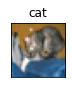

In [ ]:
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[0])
plt.title(out)
plt.show()

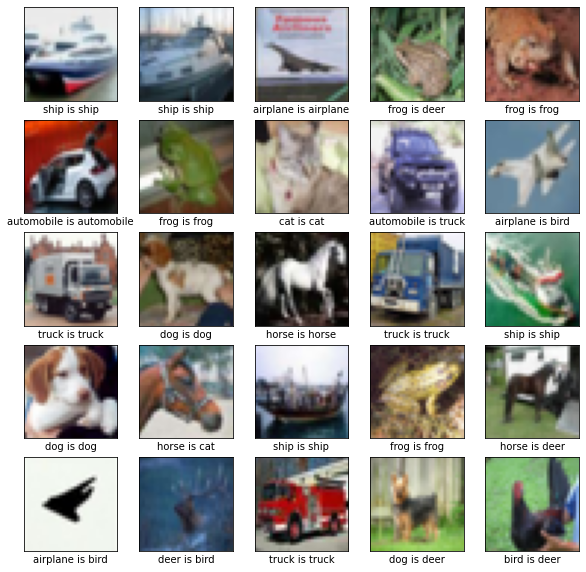

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1, 26):
    result = model.predict(np.array([test_images[i]]))
    prediction = result[0].argmax() 
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    orig = class_names[test_labels[i][0]]
    pred = class_names[prediction]
    label = f'{orig} is {pred}'
    plt.xlabel(label)
plt.show()

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/ship.jpg')

In [ ]:
img.size

(1772, 1174)

In [ ]:
test_img = img.resize((32,32),resample=Image.LANCZOS)

In [ ]:
test_img_array = np.array(test_img)

In [ ]:
np.array([test_img_array]).shape

(1, 32, 32, 3)

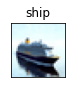

In [ ]:
result = model.predict(np.array([test_img_array]))
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(test_img_array)
plt.title(class_names[result[0].argmax()])
plt.show()

In [ ]:
saved_model = tf.keras.models.load_model('/content/cifar_10_Model_60_percent.h5')

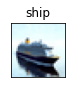

In [ ]:
result = saved_model.predict(np.array([test_img_array]))
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(test_img_array)
plt.title(class_names[result[0].argmax()])
plt.show()